In [4]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc


%matplotlib inline

In [5]:
df_math = pd.read_csv('student-mat.csv')
df_port = pd.read_csv('student-por.csv')


In [6]:
cat_data = pd.get_dummies(df_port[['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']],drop_first=True)
nominal_cat = pd.get_dummies(df_port[['Mjob','Fjob','reason','guardian']],drop_first=True)
numeric_data = df_port[['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','absences','failures']]

In [7]:
grades = pd.DataFrame()
#pass = 0, fail = 1
def passfail(grade):
    if grade >=10:
        return 0
    if grade <10:
        return 1
grades['G1'] = df_port['G1'].apply(passfail)
grades['G2'] = df_port['G2'].apply(passfail)
grades['G3'] = df_port['G3'].apply(passfail)

In [8]:
df = pd.concat([grades, cat_data,numeric_data, nominal_cat], axis = 1)

In [9]:
df.to_csv('df_students.csv', encoding='utf-8', index=False)

In [10]:
df.columns

Index(['G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'failures', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other'],
      dtype='object')

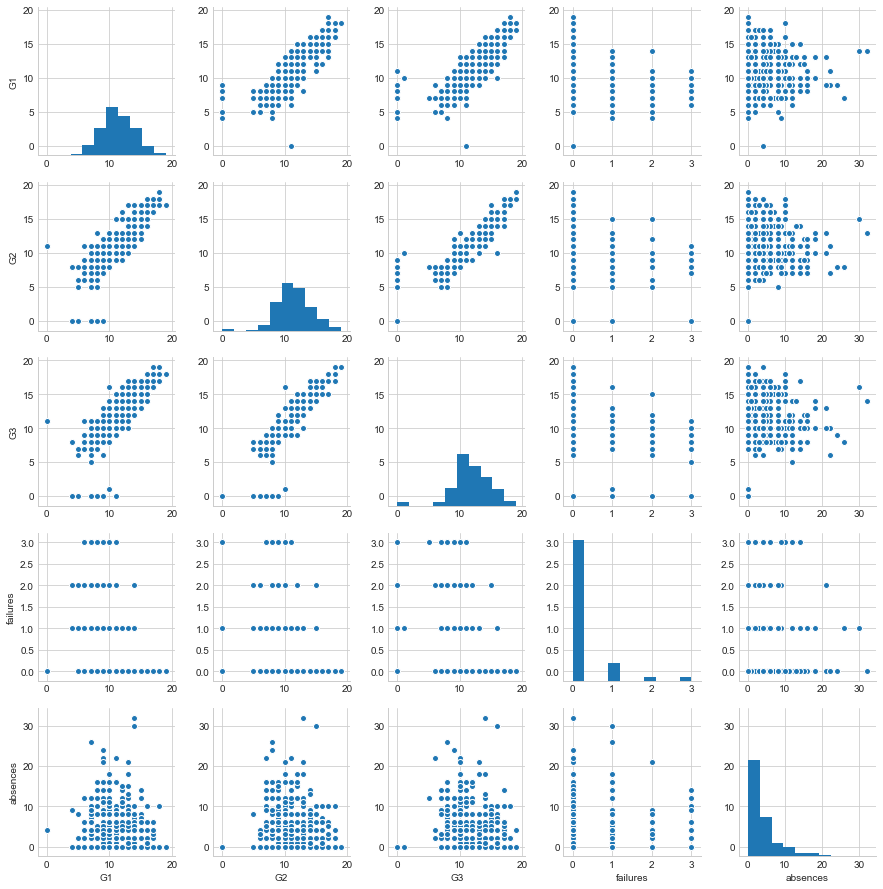

In [21]:
sns.pairplot(df_port[['G1', 'G2', 'G3','sex','address','higher', 'internet','romantic','failures','absences']])

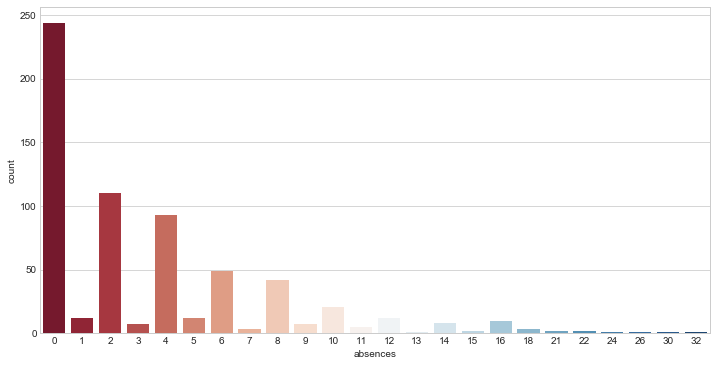

In [32]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='absences',data=df_port,palette='RdBu')

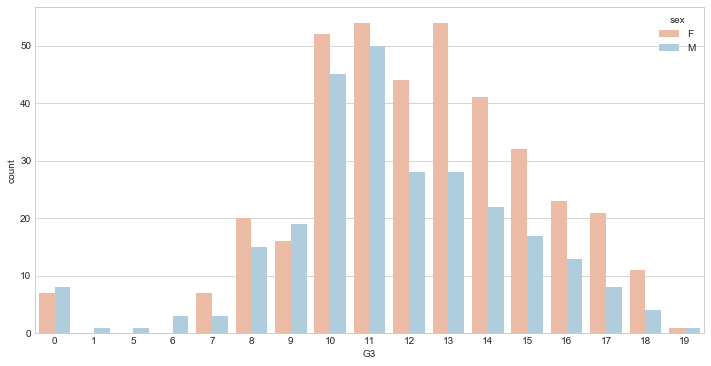

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='G3',hue='sex',data=df_port,palette='RdBu')

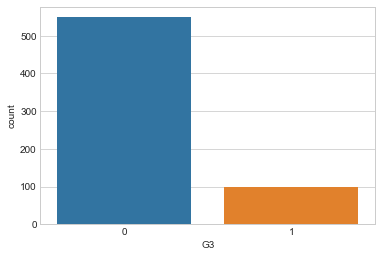

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='G3',data=grades)

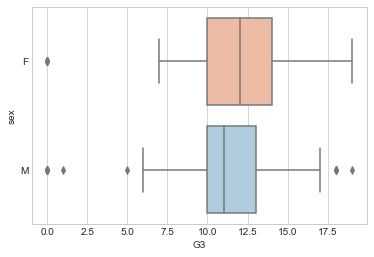

In [25]:
sns.boxplot(x='G3',y='sex',data=df_port,palette='RdBu')

## Train/Test Split

In [26]:
X = df.drop(['G1','G2','G3'], axis = 1)
y = df['G3']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
import statsmodels.api as sm
x = sm.add_constant(X_train, prepend = False)
model = sm.GLM(y_train, X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     G3   No. Observations:                  434
Model:                            GLM   Df Residuals:                      395
Model Family:                Gaussian   Df Model:                           38
Link Function:               identity   Scale:                  0.106033864431
Method:                          IRLS   Log-Likelihood:                -108.44
Date:                Sun, 18 Feb 2018   Deviance:                       41.883
Time:                        18:50:04   Pearson chi2:                     41.9
No. Iterations:                     2                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
school_MS             0.2144      0.040      5.356      0.000       0.136       0.293
sex_M                 0.0361      0.038      0.953      0.340      -0.038       0.110
address_U            -0.0239      0.039     -0.609      0.543      -0.101       0.053
famsize_LE3          -0.0516      0.037     -1.387      0.165      -0.125       0.021
Pstatus_T             0.0064      0.053      0.120      0.905      -0.098       0.111
schoolsup_yes         0.0600      0.053      1.122      0.262      -0.045       0.165
famsup_yes            0.0126      0.034      0.368      0.713      -0.054       0.080
paid_yes              0.0214      0.070      0.304      0.761      -0.117       0.159
activities_yes       -0.0162      0.033     -0.486      0.627      -0.082       0.049
nursery_yes           0.0392      0.041      0.967      0.333      -0.040       0.119
higher_yes           -0.1770      0.055     -3.238      0.001      -0.284      -0.070
internet_yes         -0.0067      0.041     -0.164      0.870      -0.087       0.074
romantic_yes          0.0261      0.035      0.748      0.454      -0.042       0.095
age                  -0.0024      0.009     -0.283      0.777      -0.019       0.014
Medu                  0.0214      0.023      0.916      0.360      -0.024       0.067
Fedu                 -0.0221      0.022     -1.018      0.309      -0.065       0.020
traveltime           -0.0182      0.023     -0.785      0.432      -0.064       0.027
studytime            -0.0068      0.021     -0.325      0.745      -0.048       0.034
famrel               -0.0175      0.017     -1.001      0.317      -0.052       0.017
freetime              0.0260      0.016      1.593      0.111      -0.006       0.058
goout                 0.0006      0.016      0.035      0.972      -0.031       0.032
Dalc                  0.0114      0.022      0.517      0.605      -0.032       0.055
Walc                  0.0042      0.018      0.236      0.813      -0.030       0.039
health               -0.0008      0.012     -0.072      0.942      -0.024       0.022
absences              0.0066      0.004      1.737      0.082      -0.001       0.014
failures              0.1772      0.031      5.792      0.000       0.117       0.237
Mjob_health           0.0074      0.081      0.091      0.927      -0.151       0.165
Mjob_other            0.0149      0.045      0.333      0.739      -0.073       0.103
Mjob_services         0.0072      0.057      0.128      0.898      -0.104       0.118
Mjob_teacher         -0.0687      0.078     -0.882      0.378      -0.221       0.084
Fjob_health           0.2529      0.120      2.115      0.034       0.019       0.487
Fjob_other            0.1178      0.067      1.764      0.078      -0.013       0.249
Fjob_services         0.1577      0.070      2.238      0.025       0.020       0.296
Fjob_teacher          0.1876      0.112      1.671      0.095     

#### with normalization

In [8]:
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X)